----

# 하나의 상호작용이 있는 다중회귀모형

url : http://rpubs.com/cardiomoon/153265

## 1. Mtcars Dataset

MASS패키지에 포함되어 있는 자동차의 연비에 대한 데이터 셋이다. 

1. MPG(Mile Per Gallon) : 연비
1. Cyl(Number of Cylinder) : 실린더 번호
1. Disp(Displacement) : 배기량
1. HP(Gross Housepower) : 총 마력
1. Drat(Rear Axle Ratio) : 비율대
1. Wt(Weight) : 공차중량
1. Qsec(1/4 Mile Time) : 1/4마일
1. Vs(Engine) : V형태는 0, 직선형은 1
1. Am(Transmission) : 기어변환, 자동형은 0, 수동은 1
1. Gear(Number of Forward Gears) : 전방기어 번호
1. Carb(Number of Carburetors) : 기화기 번호

In [1]:
require(MASS)
head(mtcars)
str(mtcars)

Loading required package: MASS


,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


'data.frame':	32 obs. of  11 variables:
 $ mpg : num  21 21 22.8 21.4 18.7 18.1 14.3 24.4 22.8 19.2 ...
 $ cyl : num  6 6 4 6 8 6 8 4 4 6 ...
 $ disp: num  160 160 108 258 360 ...
 $ hp  : num  110 110 93 110 175 105 245 62 95 123 ...
 $ drat: num  3.9 3.9 3.85 3.08 3.15 2.76 3.21 3.69 3.92 3.92 ...
 $ wt  : num  2.62 2.88 2.32 3.21 3.44 ...
 $ qsec: num  16.5 17 18.6 19.4 17 ...
 $ vs  : num  0 0 1 1 0 1 0 1 1 1 ...
 $ am  : num  1 1 1 0 0 0 0 0 0 0 ...
 $ gear: num  4 4 4 3 3 3 3 4 4 4 ...
 $ carb: num  4 4 1 1 2 1 4 2 2 4 ...


# 2. 연속형 변수와 범주형 변수

하나의 연속형 변수와 하나의 범주형 변수 및 상호작용을 갖는 다중회귀모형에서 회귀계수를 추출하고 회귀선을 시각화해본다. Am은 수동변속일 경우 0, 자동변속의 경우 1로 설정되어 있는데 am1 칼럼을 새로 만들고 수동을 "manual", 자동을 "Automatic"으로 만들어보자.

In [5]:
mtcars$am1 <- ifelse(mtcars$am==1, "automatic", "manual")
head(mtcars)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,am1
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4,automatic
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4,automatic
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1,automatic
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1,manual
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2,manual
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1,manual


mpg를 반응변수로, am1, wt를 영향변수로 하는 다중회귀모형을 만들어보자.
- am1은 "automatic", "manual" 두 개의 고유값을 가짐
- 따로 Reference를 정해주지 않으면 알파벳순으로 빠른 "automatic"을 reference로 취급

In [13]:
fit1 <- lm(mpg~wt*am1, data=mtcars)
summary(fit1)
fit1$coef


Call:
lm(formula = mpg ~ wt * am1, data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.6004 -1.5446 -0.5325  0.9012  6.0909 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)    46.294      3.010  15.379 3.49e-15 ***
wt             -9.084      1.212  -7.493 3.68e-08 ***
am1manual     -14.878      4.264  -3.489  0.00162 ** 
wt:am1manual    5.298      1.445   3.667  0.00102 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.591 on 28 degrees of freedom
Multiple R-squared:  0.833,	Adjusted R-squared:  0.8151 
F-statistic: 46.57 on 3 and 28 DF,  p-value: 5.209e-11


(Intercept)           wt    am1manual wt:am1manual 
   46.294478    -9.084268   -14.878423     5.298360

회귀결과 요약을 보면 먼저 자동변속기의 경우(am1="automatic")의 wt와 mpg의 회귀식은 다음과 같다.
$$ mpg=-9.084\times{wt}+37.297  $$

수동변속의 경우(am1="manual") 회귀식은 아래와 같다.
$$mpg=(-9.084+5.298)\times{wt}+(46.29-14.87)$$

## 3. 그래프
이 두개의 회귀식을 직선으로 그려보면 다음과 같다.

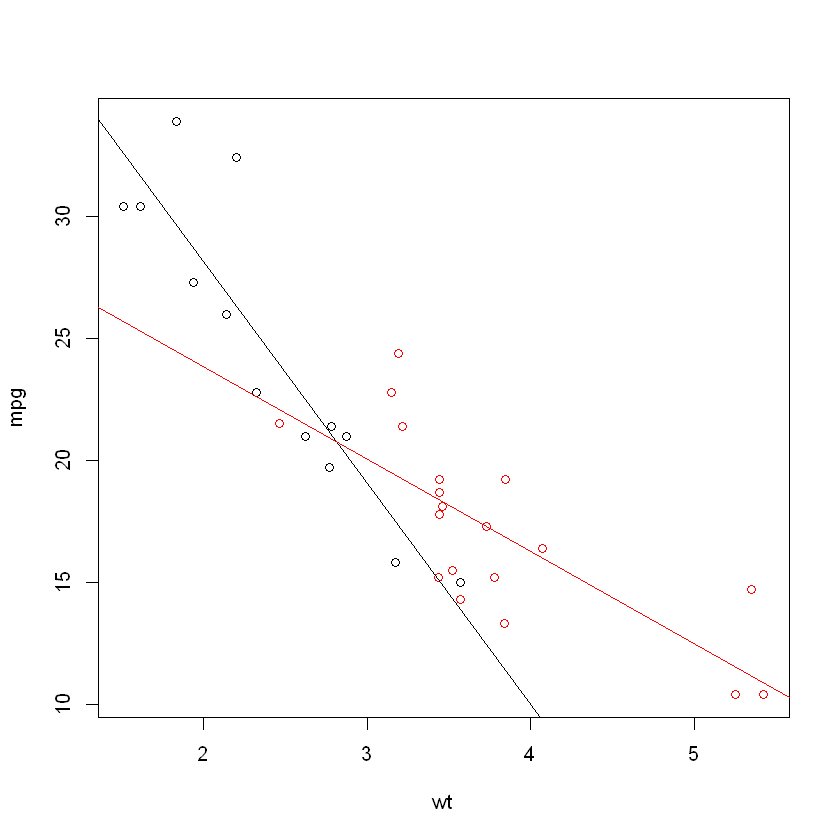

In [19]:
plot(mpg~wt, data=mtcars, col=factor(mtcars$am1))
abline(a=fit1$coef[1], b=fit1$coef[2])
abline(a=fit1$coef[1]+fit1$coef[3], b=fit1$coef[2]+fit1$coef[4], col="red")

ggplt의 stat_smooth()를 사용하면 회귀직선을 알아서 그려준다.

In [ ]:
require(ggplot2)

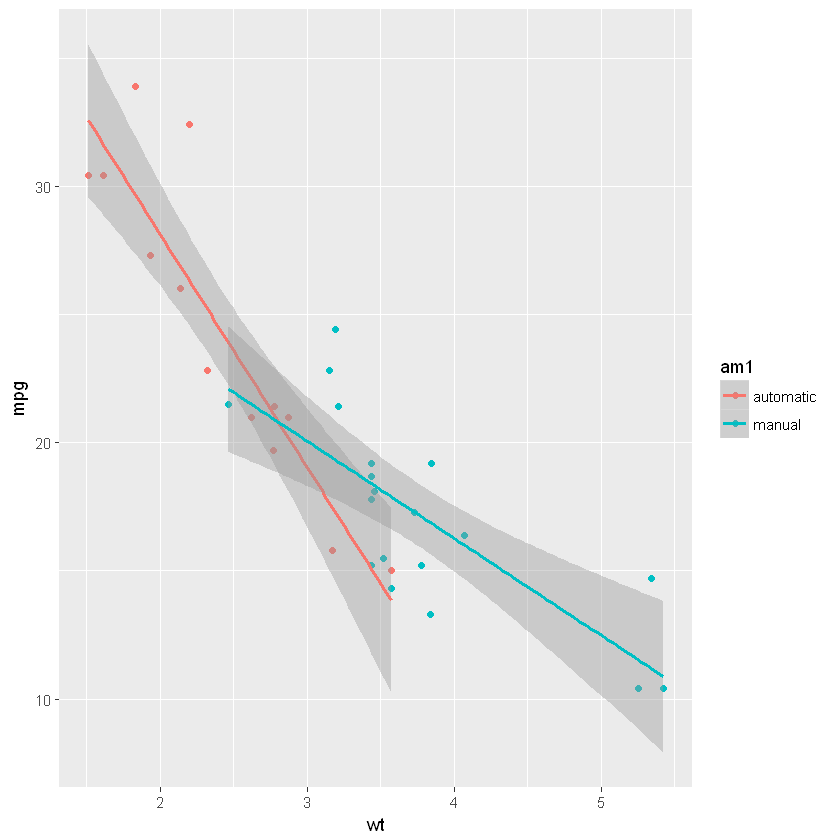

In [34]:
p <- ggplot(data=mtcars, aes(x=wt, y=mpg, colour=am1))+geom_point()+geom_smooth(method="lm")
p

ggplot의 회귀선이 맞는지 보기 위해 우리가 계산한 회귀직선을 덧그려보면 다음과 같다.

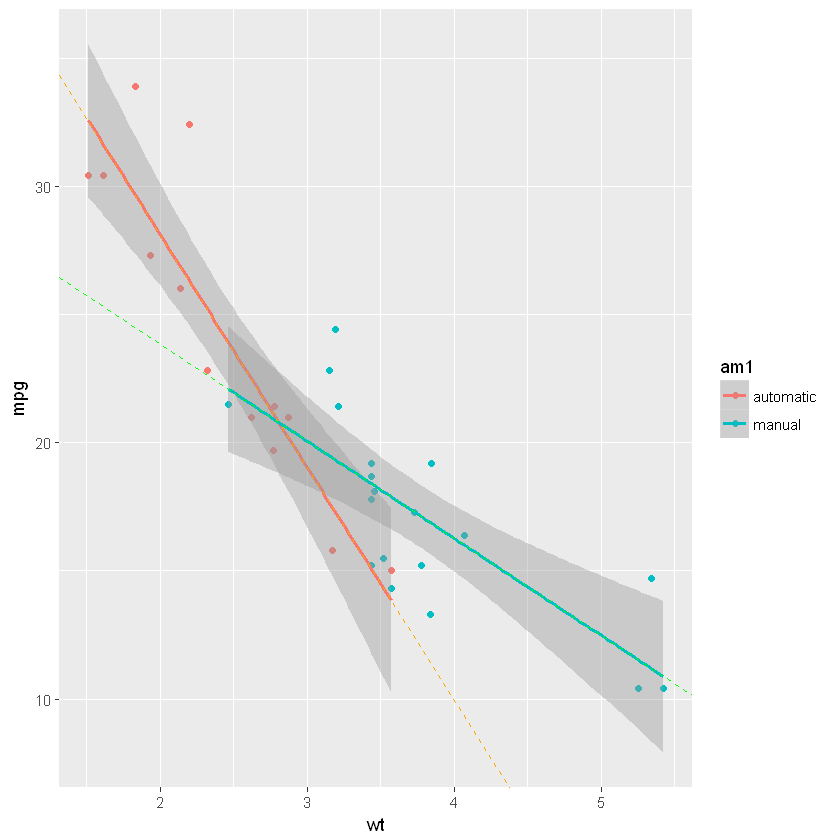

In [35]:
p <- p+geom_abline(intercept = fit1$coef[1], slope = fit1$coef[2], colour="orange", linetype=2)
p <- p+geom_abline(intercept = fit1$coef[1]+fit1$coef[3], slope = fit1$coef[2]+fit1$coef[4], colour="green", linetype=2)
p

당연한 결과지만 회귀직선이 정확히 일치함을 알 수 있다.

----